In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [2]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(64, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(1))
modelE.add(Activation('sigmoid'))

modelE.compile(loss='binary_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [3]:
files = glob('savio_nets/chirality_classification_*_history_v9.h5')

In [4]:
files

['savio_nets/chirality_classification_00pwrongleftrightlabels_history_v9.h5',
 'savio_nets/chirality_classification_05pwrongleftrightlabels_history_v9.h5',
 'savio_nets/chirality_classification_10pwrongleftrightlabels_history_v9.h5',
 'savio_nets/chirality_classification_20pwrongleftrightlabels_history_v9.h5',
 'savio_nets/chirality_classification_40pwrongleftrightlabels_history_v9.h5',
 'savio_nets/chirality_classification_50pwrongleftrightlabels_history_v9.h5']

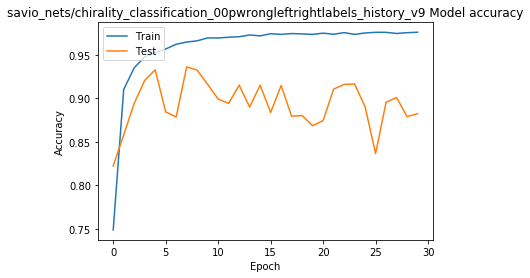

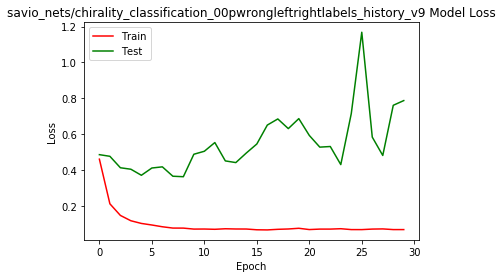

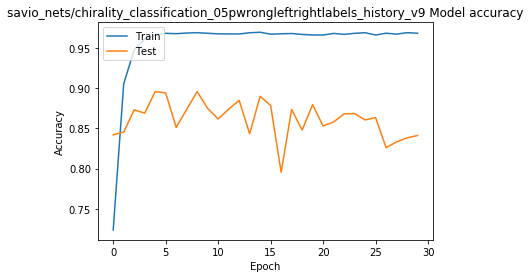

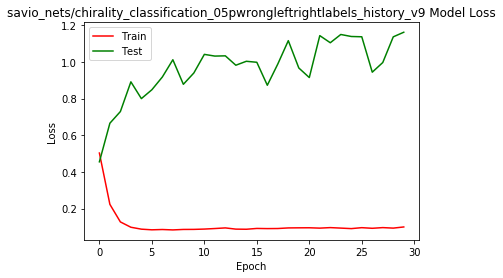

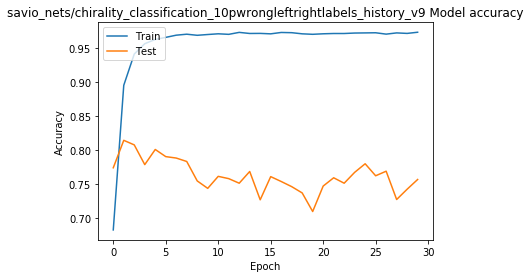

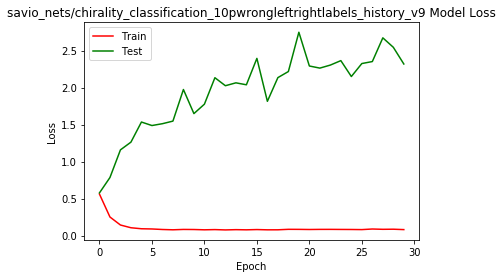

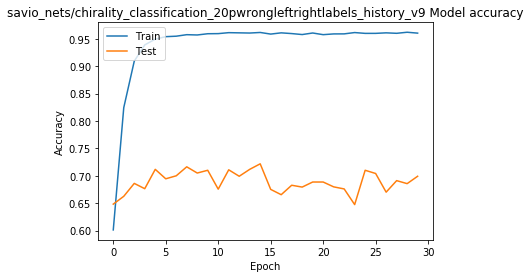

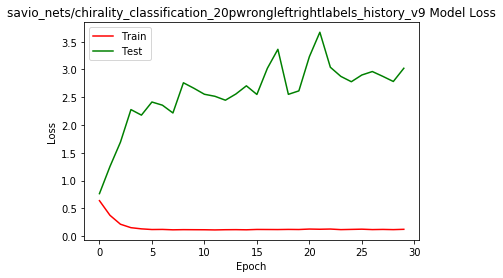

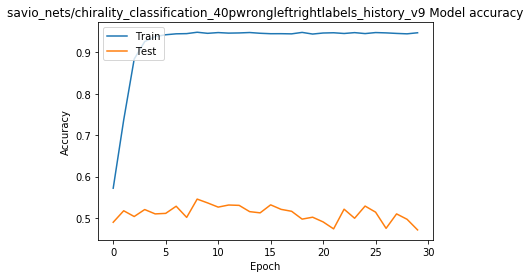

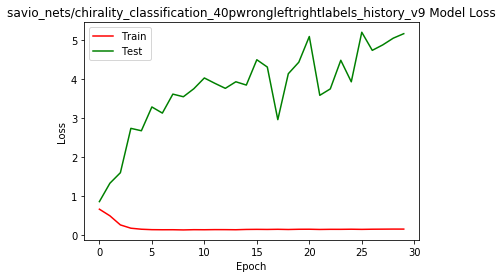

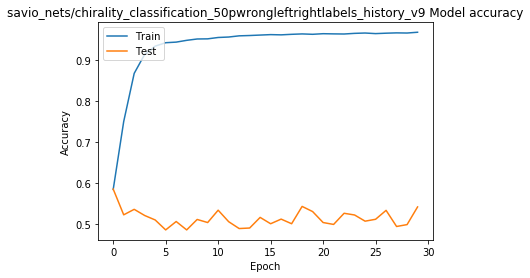

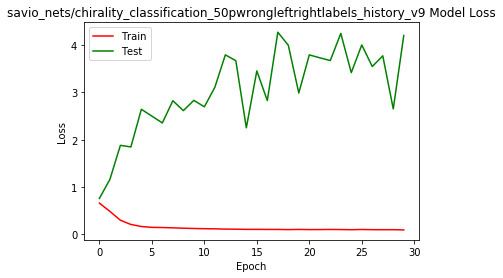

In [5]:
for f in files:
    history = h5py.File(f,'r')
    plt.plot(history['acc'][:])
    plt.plot(history['val_acc'][:])
    plt.title(f.split('.')[0]+' Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history['loss'],color='r')
    plt.plot(history['val_loss'],color='g')
    plt.title(f.split('.')[0]+' Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [8]:
weights = glob('savio_nets/chirality_classification_*_weights_v9.h5')

In [9]:
weights

['savio_nets/chirality_classification_00pwrongleftrightlabels_weights_v9.h5',
 'savio_nets/chirality_classification_05pwrongleftrightlabels_weights_v9.h5',
 'savio_nets/chirality_classification_10pwrongleftrightlabels_weights_v9.h5',
 'savio_nets/chirality_classification_20pwrongleftrightlabels_weights_v9.h5',
 'savio_nets/chirality_classification_40pwrongleftrightlabels_weights_v9.h5',
 'savio_nets/chirality_classification_50pwrongleftrightlabels_weights_v9.h5']

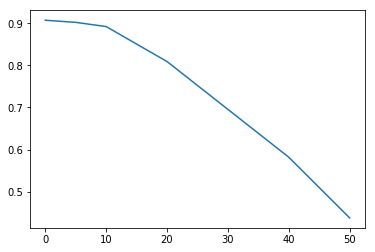

In [11]:
label_error = [0,5,10,20,40,50]
test_acc = [0.907,0.902,0.892,0.809,0.582,0.438]
plt.plot(label_error,test_acc)